In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import netCDF4

In [2]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [3]:
print('{:05}'.format(23))


00023


In [4]:
from matplotlib import animation, rc

from IPython.display import HTML


In [45]:
fig = plt.figure()
ax = plt.subplot(111)
lon,lat, z = ew2py('../easywave/eWave.2D.{:05}.ssh'.format(0))
p = ax.pcolormesh(lon,lat,z,cmap=plt.cm.bwr,vmin=-5,vmax=5)
ax.set_aspect(1)
fig.set_size_inches((8,8))
def animate(i):
    frame = i * 300
    print('frame {} of easywave'.format(frame))
    lon,lat, z = ew2py('../easywave/eWave.2D.{:05}.ssh'.format(frame))
    p = plt.pcolormesh(lon,lat,z,cmap=plt.cm.bwr,vmin=-5,vmax=5)
    return p,

anim = animation.FuncAnimation(fig, animate, frames=24, interval=400,)
HTML(anim.to_html5_video())

frame 0 of easywave
frame 0 of easywave
frame 300 of easywave
frame 600 of easywave
frame 900 of easywave
frame 1200 of easywave
frame 1500 of easywave
frame 1800 of easywave
frame 2100 of easywave
frame 2400 of easywave
frame 2700 of easywave
frame 3000 of easywave
frame 3300 of easywave
frame 3600 of easywave
frame 3900 of easywave
frame 4200 of easywave
frame 4500 of easywave
frame 4800 of easywave
frame 5100 of easywave
frame 5400 of easywave
frame 5700 of easywave
frame 6000 of easywave
frame 6300 of easywave
frame 6600 of easywave
frame 6900 of easywave


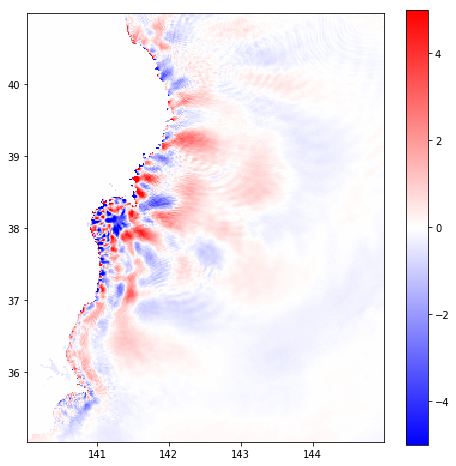

In [71]:
fig = plt.figure()
ax = plt.subplot(111)
lon,lat, z = ew2py('../easywave/eWave.2D.{:05}.ssh'.format(7200))
p = ax.pcolormesh(lon,lat,z,cmap=plt.cm.bwr,vmin=-5,vmax=5)
ax.set_aspect(1)
fig.set_size_inches((8,8))
fig.colorbar(p)
plt.show()

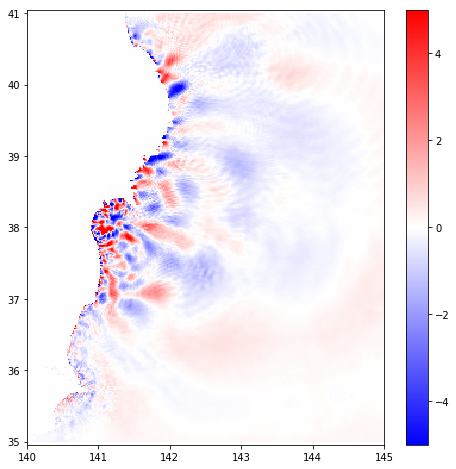

In [69]:
ztlab = np.loadtxt('/home/tsunamilab/Downloads/tlab2D (36)',delimiter=',',skiprows=1).reshape((361,301))

plt.pcolormesh(np.linspace(140,145,301), np.linspace(35,41,361),ztlab,cmap=plt.cm.bwr, vmin=-5,vmax=5)
plt.colorbar()
plt.gcf().set_size_inches((8,8))
plt.axis('equal')
plt.show()

In [72]:
ztlab.max(), z.max()

(29.310802459716797, 21.031352996826172)